##  IoT-based AQI Estimation using Image Processing and Learning Methods

Import the necessary libraries.

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay


print("The libraries are loaded.")

The libraries are loaded.


### Air Quality Index (AQI) Levels

The Air Quality Index (AQI) is a measure used to communicate the air quality in a specific location. It provides information about the level of pollutants present in the air and their potential impact on human health.

The AQI is typically categorized into several levels, each representing a different degree of air pollution. Here are the AQI levels and their corresponding descriptions:

- **0: Good**: The air quality is considered good, and air pollution poses little or no risk to health.

- **1: Satisfactory**: The air quality is acceptable; however, there may be a slight concern for some pollutants for a small number of people who are unusually sensitive to air pollution.

- **2: Moderate**: The air quality may start to adversely affect the health of a larger group of people. Sensitive individuals should take precautions.

- **3: Poor**: The air quality is considered unhealthy for sensitive groups such as children, the elderly, and individuals with respiratory or heart conditions.

- **4: Severe**: The air quality is severely polluted and can have serious health effects on the general population. Everyone should take measures to protect their health.

It's essential to stay informed about the AQI levels in your area, especially if you fall into a sensitive group. You can use the AQI values to make decisions about outdoor activities and take necessary precautions to reduce exposure to air pollution.

Remember that the AQI is determined by various pollutants such as particulate matter 2.5 and 10, ozone, sulfur dioxide, nitrogen dioxide, and carbon monoxide. Different countries might have variations in how they calculate and report AQI values.


In [37]:
AQI_DICT = {0:"Good", 1:"Satisfactory", 2:"Moderate", 3:"Poor", 4:"Severe"}

In [38]:
def categorize_aqi(aqi_value):
    if 0 <= aqi_value <= 50:
        return 0
    if 51 <= aqi_value <= 100:
        return 1
    if 101 <= aqi_value <= 200:
        return 2
    if 201 <= aqi_value <= 300:
        return 3
    if 301 <= aqi_value <= 400:
        return 4
    

The dataset is stored in aqi.csv. To process the dataset, the dataset need to read using pandas library.

In [39]:
csv = "aqi.csv"
data = pd.read_csv(csv)

In [40]:
data

,Unnamed: 0,Index,created_at,PM2.5(PMS),PM10(PMS),Temperature,Humidity,PM2.5(SDS),PM10(SDS),Image,...,PM2.5_SubIndex,PM10_SubIndex,Checks,AQI_calculated,AQI_bucket_calculated,aqi,aqi_cat,aqi_cat_2,Visibility_Score_Front,Visibility_Score_Rear
0,1103,2.0,2022-10-22 18:00:00,64.0,78.0,26.95,43.451,34.5,76.2,1661.0,...,43.525000,41.0112,2.0,44.0,Good,43.525000,0,0.0,0.293951,0.265908
1,1104,3.0,2022-10-22 18:00:00,62.0,77.0,26.96,43.463,35.7,79.0,1662.0,...,44.705000,41.9240,2.0,45.0,Good,44.705000,0,0.0,0.274955,0.276226
2,1105,4.0,2022-10-22 18:00:00,62.0,77.0,26.98,43.566,35.7,77.3,1663.0,...,44.705000,41.3698,2.0,45.0,Good,44.705000,0,0.0,0.271433,0.272091
3,1106,5.0,2022-10-22 18:00:00,60.0,75.0,26.99,43.598,36.2,76.3,1664.0,...,45.196667,41.0438,2.0,45.0,Good,45.196667,0,0.0,0.266468,0.266174
4,1107,6.0,2022-10-22 18:00:00,58.0,75.0,26.96,43.676,35.8,73.7,1665.0,...,44.803333,40.1962,2.0,45.0,Good,44.803333,0,0.0,0.258207,0.264451
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4413,18186,779.0,2023-02-08 17:59:00,174.0,184.0,32.89,35.751,76.4,125.4,32297.0,...,84.726667,57.0504,2.0,85.0,Satisfactory,84.726667,1,1.0,0.264258,0.322146
4414,18187,781.0,2023-02-08 18:00:00,104.0,117.0,32.89,35.947,55.0,110.9,32299.0,...,63.683333,52.3234,2.0,64.0,Satisfactory,63.683333,1,1.0,0.223957,0.318623
4415,18188,782.0,2023-02-08 18:00:00,115.0,130.0,32.88,35.875,54.9,107.7,32300.0,...,63.585000,51.2802,2.0,64.0,Satisfactory,63.585000,1,1.0,0.219855,0.306010
4416,18189,783.0,2023-02-08 18:00:00,106.0,121.0,32.88,35.979,57.4,110.0,32301.0,...,66.043333,52.0300,2.0,66.0,Satisfactory,66.043333,1,1.0,0.211664,0.295450


Datapoints disrtibution across vairous AQI categories.

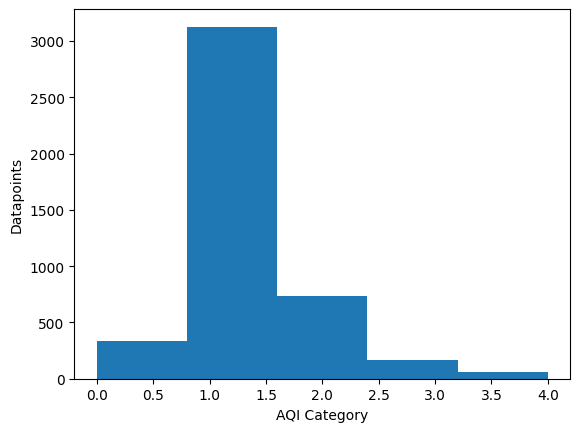

In [41]:
plt.hist(data["aqi_cat_2"], histtype='bar', bins=5)
plt.xlabel('AQI Category')
plt.ylabel('Datapoints')
plt.show()

### Data Features and Labels

In the data preprocessing step, we've extracted specific features from our dataset and assigned them to the `data_features` variable. Additionally, the corresponding labels have been stored in the `labels` variable. Here's what these variables represent:

### Data Features

The `data_features` DataFrame includes the following features extracted from your dataset:

- `motorcycle`: Number of motorcycles present
- `autorickshaw`: Number of autorickshaws present
- `car`: Number of cars present
- `truck`: Number of trucks present
- `bus`: Number of buses present
- `Temperature`: Temperature reading
- `Humidity`: Humidity reading
- `Visibility_Score_Front`: Visibility score from the front camera
- `Visibility_Score_Rear`: Visibility score from the rear camera

These features serve as input variables for your AQI estimation model.

### Labels

The `labels` Series contains the target labels for our AQI categories, denoted by the column `aqi_cat_2`. Each label corresponds to a specific air quality category, which your model aims to predict.

This separation of features and labels is crucial for training and evaluating your machine learning model accurately.


In [42]:
data_features = data[['motorcycle', 'autorickshaw', 'car', 'truck', 'bus', 'Temperature', 'Humidity', 'Visibility_Score_Front', "Visibility_Score_Rear"]].copy()
labels = data["aqi_cat_2"].copy()

#### Conversion to NumPy Arrays

To facilitate machine learning model training, you've converted the extracted data features and labels into NumPy arrays.

#### Data Features (NumPy Array)

The variable `data_feat_np` now contains the data features as a NumPy array. This array holds the values of the features extracted from your dataset, ready to be used as input for your machine learning algorithms.

#### Labels (NumPy Array)

The variable `labels_np` holds the labels as a NumPy integer array. These labels correspond to the air quality categories and are formatted as integers to be used during model training and evaluation.


In [43]:
data_feat_np = data_features.values
labels_np = labels.values.astype(int)

The number of the datapoints we have in our dataset. 

In [44]:
print(data_feat_np.shape)
print(labels.shape)

(4418, 9)
(4418,)


#### Min-Max Scaling

In this section, we'll cover the process of performing Min-Max scaling on the extracted data features to ensure consistent and normalized values for your machine learning model.

Min-Max scaling transforms your features by scaling them to a specified range, often between 0 and 1. This is useful for algorithms sensitive to feature magnitudes. We'll use the `MinMaxScaler` from the `sklearn.preprocessing` module.


In [45]:
min_max_scaler = MinMaxScaler()
data_feat_np = min_max_scaler.fit_transform(data_feat_np)

In [46]:
data_feat_np

array([[0.30769231, 0.07692308, 0.15      , ..., 0.78045057, 0.4585884 ,
        0.40453897],
       [0.19230769, 0.        , 0.25      , ..., 0.78085771, 0.36726228,
        0.45920889],
       [0.30769231, 0.07692308, 0.35      , ..., 0.78435231, 0.35032832,
        0.43729952],
       ...,
       [0.11538462, 0.23076923, 0.5       , ..., 0.52341046, 0.1023606 ,
        0.6170281 ],
       [0.23076923, 0.23076923, 0.3       , ..., 0.526939  , 0.06298035,
        0.56107238],
       [0.15384615, 0.15384615, 0.45      , ..., 0.52894076, 0.07130467,
        0.63063191]])

#### Train-Test Data Split

In this section, we'll guide you through the essential step of splitting your data into training and testing sets. This separation is crucial for evaluating the performance of your machine learning model effectively.

#### Train-Test Split

The `train_test_split` function from the `sklearn.model_selection` module is used to split your data features and labels into separate training and testing sets. This helps you train your model on one subset and validate its performance on another independent subset.

In [47]:
X_train, X_test, y_train, y_test = train_test_split(data_feat_np, labels, test_size=0.2, random_state=42)
print("Train Data Shape", X_train.shape)
print("Test Data Shape", X_test.shape)

Train Data Shape (3534, 9)
Test Data Shape (884, 9)


#### k-Nearest Neighbors Classifier

In this section, we'll walk through the process of creating and evaluating a k-Nearest Neighbors (k-NN) classifier using the `KNeighborsClassifier` from scikit-learn.

The k-Nearest Neighbors algorithm is a simple yet effective classification method that assigns a class label to a data point based on the majority class of its k nearest neighbors.


In [48]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
print(f"Accuracy of the k-Nearest Neighbors Classifier: {knn_model.score(X_test, y_test)}.")


Accuracy of the k-Nearest Neighbors Classifier: 0.7149321266968326.


#### Multi-Layer Perceptron (MLP) Classifier

In this section, we'll guide you through the process of creating a Multi-Layer Perceptron (MLP) classifier using the `MLPClassifier` from scikit-learn. We'll also demonstrate how to evaluate the classifier's performance using a classification report.

The Multi-Layer Perceptron is a type of artificial neural network that is effective for a wide range of classification tasks. It consists of multiple layers of interconnected nodes, allowing it to capture complex relationships in data.


In [49]:

mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, learning_rate='adaptive')
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
target_names = ['Good', 'Satisfactory', 'Moderate', 'Poor', 'Severe']

print(classification_report(y_test, y_pred, target_names=target_names))


              precision    recall  f1-score   support

        Good       0.67      0.27      0.38        75
Satisfactory       0.75      0.95      0.84       628
    Moderate       0.44      0.15      0.22       139
        Poor       0.25      0.07      0.11        30
      Severe       0.50      0.08      0.14        12

    accuracy                           0.72       884
   macro avg       0.52      0.30      0.34       884
weighted avg       0.67      0.72      0.67       884



In [50]:
# Make predictions on testing data
y_pred = mlp.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Multi-Layer Perceptron (MLP) Classifier:", accuracy)

Accuracy of Multi-Layer Perceptron (MLP) Classifier: 0.7228506787330317


#### Support Vector Machine (SVM) Classifier

In this section, we'll guide you through the process of creating a Support Vector Machine (SVM) classifier using the `SVC` class from scikit-learn. We'll also demonstrate how to evaluate the classifier's performance using a classification report.

The Support Vector Machine is a powerful classification algorithm that aims to find the optimal hyperplane that best separates classes. It is widely used for both binary and multi-class classification tasks.

Here's how to create and evaluate an SVM classifier:

In [51]:
svm = SVC(C=10, class_weight='balanced')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
target_names = ['Good', 'Satisfactory', 'Moderately Polluted', 'Poor', 'Severe']

print(classification_report(y_test, y_pred, target_names=target_names))

                     precision    recall  f1-score   support

               Good       0.32      0.84      0.47        75
       Satisfactory       0.86      0.46      0.60       628
Moderately Polluted       0.24      0.35      0.28       139
               Poor       0.11      0.37      0.17        30
             Severe       0.08      0.33      0.13        12

           accuracy                           0.47       884
          macro avg       0.32      0.47      0.33       884
       weighted avg       0.68      0.47      0.52       884



#### Evaluating Random Forest Classifier Performance

In this section, we'll explore how to evaluate the performance of a trained Random Forest classifier using classification metrics and visualization techniques. We'll use the `classification_report` function to assess various metrics and the confusion matrix for a visual overview of results.

The `classification_report` function from scikit-learn provides a detailed summary of classification metrics for each class in your dataset. This is immensely helpful in understanding how well your Random Forest classifier is performing.

Here's how to evaluate the Random Forest classifier using `classification_report` Before Hyperparameter Tuning:

              precision    recall  f1-score   support

        Good       0.94      0.43      0.59        75
Satisfactory       0.80      0.97      0.88       628
    Moderate       0.57      0.33      0.42       139
        Poor       0.33      0.10      0.15        30
      Severe       0.00      0.00      0.00        12

    accuracy                           0.78       884
   macro avg       0.53      0.37      0.41       884
weighted avg       0.75      0.78      0.74       884



/home2/om.kathalkar/anaconda3/envs/new_env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home2/om.kathalkar/anaconda3/envs/new_env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home2/om.kathalkar/anaconda3/envs/new_env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

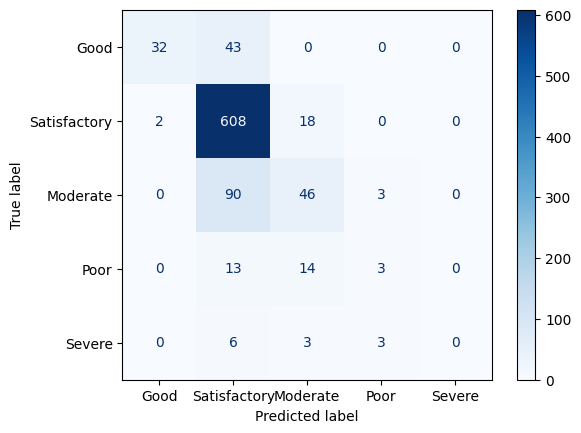

In [54]:
rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

target_names = ['Good', 'Satisfactory', 'Moderate', 'Poor', 'Severe']

report = classification_report(y_test, y_pred, target_names=target_names)
print(report)
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap='Blues')


#### Hyperparameter Tuning for Random Forest Classifier

In this section, we'll guide you through the process of hyperparameter tuning for a Random Forest classifier using `GridSearchCV` from scikit-learn. We'll also demonstrate how to evaluate the tuned classifier's performance using a classification report and a confusion matrix.

Hyperparameter tuning is crucial for optimizing model performance. We'll use a Random Forest classifier as an example to showcase the process.

Here's how to perform hyperparameter tuning and evaluate the tuned classifier:

              precision    recall  f1-score   support

        Good       0.85      0.63      0.72        75
Satisfactory       0.86      0.95      0.90       628
    Moderate       0.60      0.52      0.56       139
        Poor       0.33      0.13      0.19        30
      Severe       1.00      0.25      0.40        12

    accuracy                           0.81       884
   macro avg       0.73      0.49      0.55       884
weighted avg       0.80      0.81      0.80       884



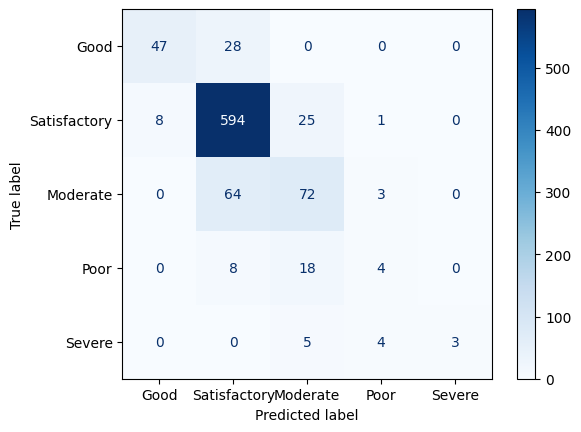

In [55]:

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 500, 700],
    'max_depth': [None, 15, 25],
    'max_features': ['sqrt', 'log2', None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]    
}

# Create a Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)

# Create GridSearchCV instance for hyperparameter tuning
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1)

# Perform hyperparameter tuning
grid_search.fit(X_train, y_train)

# Get the best model from the grid search
best_rf_model = grid_search.best_estimator_

# Predict on the test data
y_pred = best_rf_model.predict(X_test)

# Define target names for classification report
target_names = ['Good', 'Satisfactory', 'Moderate', 'Poor', 'Severe']

# Print classification report
print(classification_report(y_test, y_pred, target_names=target_names))

# Compute confusion matrix and display it
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap='Blues')

# Show the plot
plt.show()
